In [1]:
import pandas_datareader as pdr
import yfinance as yf
import pandas as pd

In [2]:
df = yf.download("TTM", start="2015-02-01", end="2021-02-01")
df.to_csv('tata.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
df=pd.read_csv('tata.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-02,49.840000,50.889999,49.810001,50.759998,50.738800,1106300
1,2015-02-03,51.259998,51.799999,50.580002,51.470001,51.448509,1824100
2,2015-02-04,50.759998,51.049999,49.459999,50.540001,50.518894,1450000
3,2015-02-05,49.830002,50.250000,47.299999,47.849998,47.830017,3348600
4,2015-02-06,47.830002,47.889999,46.509998,46.669998,46.650509,1992400
...,...,...,...,...,...,...,...
1505,2021-01-25,18.840000,18.940001,18.160000,18.549999,18.549999,4291400
1506,2021-01-26,18.280001,18.520000,18.170000,18.450001,18.450001,1863100
1507,2021-01-27,17.860001,18.160000,17.740000,17.820000,17.820000,2362100
1508,2021-01-28,18.160000,18.660000,18.110001,18.559999,18.559999,3146100


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0       50.759998
1       51.470001
2       50.540001
3       47.849998
4       46.669998
          ...    
1505    18.549999
1506    18.450001
1507    17.820000
1508    18.559999
1509    17.809999
Name: Close, Length: 1510, dtype: float64

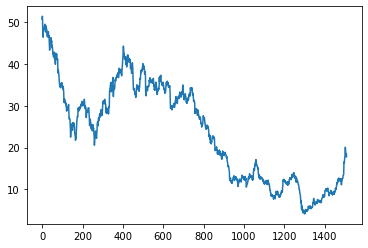

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(981, 529)

In [12]:
train_data

array([[0.98501788],
       [1.        ],
       [0.9803756 ],
       [0.92361252],
       [0.89871275],
       [0.89385941],
       [0.92234648],
       [0.92213542],
       [0.92508962],
       [0.93395229],
       [0.94070476],
       [0.94619112],
       [0.95252163],
       [0.95969614],
       [0.94724626],
       [0.93268617],
       [0.93585143],
       [0.94049378],
       [0.95252163],
       [0.94598014],
       [0.91854821],
       [0.93416327],
       [0.93627347],
       [0.92044734],
       [0.91622703],
       [0.90419918],
       [0.89554757],
       [0.91770413],
       [0.90272208],
       [0.90377714],
       [0.91707111],
       [0.92192444],
       [0.89301541],
       [0.90356616],
       [0.89976789],
       [0.87550113],
       [0.84553704],
       [0.8284448 ],
       [0.84237179],
       [0.85334458],
       [0.8647394 ],
       [0.8843638 ],
       [0.87592317],
       [0.89196027],
       [0.8822536 ],
       [0.87676725],
       [0.8691707 ],
       [0.875

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(880, 100)
(880,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(428, 100)
(428,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2021-11-23 22:15:08.739990: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

2021-11-23 22:20:19.858953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-23 22:20:19.860309: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2304005000 Hz


Epoch 1/100
14/14 [==============================] - 10s 508ms/step - loss: 0.1553 - val_loss: 0.0054
Epoch 2/100
14/14 [==============================] - 6s 428ms/step - loss: 0.0151 - val_loss: 0.0187
Epoch 3/100
14/14 [==============================] - 5s 378ms/step - loss: 0.0052 - val_loss: 0.0134
Epoch 4/100
14/14 [==============================] - 37804s 2908s/step - loss: 0.0041 - val_loss: 0.0065
Epoch 5/100
14/14 [==============================] - 5s 394ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 6/100
14/14 [==============================] - 6s 408ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 7/100
14/14 [==============================] - 5s 393ms/step - loss: 0.0017 - val_loss: 8.7357e-04
Epoch 8/100
14/14 [==============================] - 5s 379ms/step - loss: 0.0016 - val_loss: 7.7651e-04
Epoch 9/100
14/14 [==============================] - 5s 378ms/step - loss: 0.0016 - val_loss: 7.5608e-04
Epoch 10/100
14/14 [==============================] - -37792s -2907138595u

14/14 [==============================] - 5s 375ms/step - loss: 5.5147e-04 - val_loss: 3.0521e-04
Epoch 77/100
14/14 [==============================] - 6s 407ms/step - loss: 4.9365e-04 - val_loss: 2.8243e-04
Epoch 78/100
14/14 [==============================] - 6s 400ms/step - loss: 5.3062e-04 - val_loss: 2.7900e-04
Epoch 79/100
14/14 [==============================] - 5s 378ms/step - loss: 5.0887e-04 - val_loss: 2.6711e-04
Epoch 80/100
14/14 [==============================] - 6s 408ms/step - loss: 5.2912e-04 - val_loss: 3.7703e-04
Epoch 81/100
14/14 [==============================] - 5s 380ms/step - loss: 6.4424e-04 - val_loss: 2.7698e-04
Epoch 82/100
14/14 [==============================] - 6s 400ms/step - loss: 5.2768e-04 - val_loss: 3.1931e-04
Epoch 83/100
14/14 [==============================] - 5s 376ms/step - loss: 5.9352e-04 - val_loss: 2.9579e-04
Epoch 84/100
14/14 [==============================] - 6s 414ms/step - loss: 5.1466e-04 - val_loss: 2.7437e-04
Epoch 85/100
14/14 [===